# City of Toronto Zoning By-Law Data

The City of Toronto's Zoning By-law dataset, available on the Open Data Portal, provides information on zoning regulations within the city. This dataset is essential for understanding land use designations, building requirements, and permissible activities across different zones in Toronto. It serves as a valuable resource for urban planners, developers, and residents interested in the city's zoning framework.

The dataset includes the following details:
1. Zone Classifications: Categories such as residential, commercial, industrial, and mixed-use zones with subcategories that further define land use within each zone.
2. Permitted Uses: Lists of activities allowed in each zone (e.g., residential dwellings, retail spaces, or manufacturing facilities).
3. Holding status for the zone.
5. Building Regulations: Maximum building heights, floor area ratios, maximum number of dwelling units, and density limits. Setback requirements and lot coverage specifications.
6. Overlay zones: Additional regulations for specific areas, like heritage conservation districts or floodplains.
7. Special Exceptions to zoning rules.
8. Geospatial data that includes zoning boundries and spatial attributes.
9. Administrative details: Relevant by-law numbers and dates of enactment, as well as links to related municipal policies or amendments.

Accessing this dataset can aid in making informed decisions regarding property development, compliance with zoning laws, and understanding the urban planning landscape of Toronto. In these sets of codes, it will assist in classifying wards in Toronto as low, medium, or high risk for collisions by adding features to assist in predicting the classification. 

## Setup Notebook

In [4]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pylab as plt

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

## Import City of Toronto Zoning By-Law Geojson File

A GeoJSON file is a geospatial data format based on JSON (JavaScript Object Notation). It is used to represent geographic features, their attributes, and their spatial extents. This GeoJSON file is a contains 11,719 features, each representing a zoning area in the City of Toronto. Each feature includes properties like zoning classifications, frontage, density, and coverage, alongside geometries like MultiPolygon for spatial representation.

In [7]:
# Import dataset as a geoDataFrame
zoning_data = gpd.read_file('Zoning Area - 4326.geojson')

# View geoDataFrame
zoning_data.head()

,_id,GEN_ZONE,ZN_ZONE,ZN_HOLDING,HOLDING_ID,FRONTAGE,ZN_AREA,UNITS,DENSITY,COVERAGE,...,ZN_EXCPTN,EXCPTN_NO,STAND_SET,ZN_STATUS,ZN_STRING,AREA_UNITS,ZBL_CHAPT,ZBL_SECTN,ZBL_EXCPTN,geometry
0,1,2,UT,N,0,-1.0,-1,-1,-1.0,0.0,...,N,0,-1,2,UT,-1.0,100,100.10,,"MULTIPOLYGON (((-79.2097 43.81729, -79.20961 4..."
1,2,1,ON,N,0,-1.0,-1,-1,-1.0,0.0,...,N,0,-1,0,ON,-1.0,90,90.20,,"MULTIPOLYGON (((-79.50273 43.70976, -79.50195 ..."
2,3,0,RD,N,0,14.0,510,0,0.0,0.0,...,Y,1058,-1,2,RD (f14.0; a510) (x1058),0.0,10,10.20,900.3.10(1058),"MULTIPOLYGON (((-79.27433 43.80068, -79.27425 ..."
3,4,1,O,N,0,-1.0,-1,-1,-1.0,0.0,...,N,0,-1,3,O,-1.0,90,90.10,,"MULTIPOLYGON (((-79.5704 43.72175, -79.57042 4..."
4,5,0,RD,N,0,0.0,0,0,0.0,0.0,...,Y,1040,-1,2,RD (x1040),0.0,10,10.20,900.3.10(1040),"MULTIPOLYGON (((-79.26202 43.81195, -79.26214 ..."


Creating a Folium map of this data allows one to visually explore and interact with the zoning areas, making it easier to understand spatial relationships, patterns, and distributions. THerefore, let's create a folium map centered on Toronto. 

In [9]:
# import folium

# # Define Toronto's latitude and longitude
# toronto_coords = [43.65107, -79.347015]

# # Create a folium map centered on Toronto
# m = folium.Map(location=toronto_coords, zoom_start=12)

# # Add the GeoJSON layer to the map
# folium.GeoJson(
#     zoning_data,
#     name='Zoning Areas'
# ).add_to(m)

# # Add a layer control panel
# folium.LayerControl().add_to(m)

# # Display the map
# m

## Data Analysis

Let's exploring the zoning data columns (features).

In [12]:
# Check the number of columns and rows
zoning_data.shape

(11719, 25)

In [13]:
# Check the columns in geoDataFrame
zoning_data.columns

Index(['_id', 'GEN_ZONE', 'ZN_ZONE', 'ZN_HOLDING', 'HOLDING_ID', 'FRONTAGE',
       'ZN_AREA', 'UNITS', 'DENSITY', 'COVERAGE', 'FSI_TOTAL', 'PRCNT_COMM',
       'PRCNT_RES', 'PRCNT_EMMP', 'PRCNT_OFFC', 'ZN_EXCPTN', 'EXCPTN_NO',
       'STAND_SET', 'ZN_STATUS', 'ZN_STRING', 'AREA_UNITS', 'ZBL_CHAPT',
       'ZBL_SECTN', 'ZBL_EXCPTN', 'geometry'],
      dtype='object')

From the website that this data was obtained from (https://open.toronto.ca/dataset/zoning-by-law/), the columns describe the following:

- '_id': Unique row identifier for Open Data database.
- 'GEN_ZONE': The land use category of the lands within the zone boundary. Each 'zone category' has its own Chapter in the text of By-law 569-2013.
- 'ZN_ZONE': The land use category of the lands within the zone boundary. Each 'zone category' has its own Chapter in the text of By-law 569-2013.  0 = Residential 1 = Open Space 2 = Utility and Transportation 4 = Employment Industrial 5 = Institutional 6 = Commercial Residential Employment 101 = Residential Apartment 201 = Commercial 202 = Commercial Residential
- 'ZN_HOLDING':To indicate whether there is a HOLDING status for the zone. The zone label will be prefaced by the letter (H). These are not common, and when used, a Holding Zone is most often applied to specific sites. Yes (Y) or No (N)
- 'HOLDING_ID': Holding number if it exists.
- 'FRONTAGE': The required minimum Lot Frontage in the zone, and is a numeric value prefaced by the letter 'f' within a residential zone label. Unit = metres
- 'ZN_AREA':The required minimum Lot Area in the zone, and is a numeric value prefaced by the letter 'a' within a residential zone. Unit = square metres
- 'UNITS': The permitted maximum number of Dwelling Units allowed on a lot in the zone, and is a numeric value prefaced by the letter 'u' in a residential zone.
- 'DENSITY': The permitted maximum Density in the zone by FSI (floor space index), and is a numeric value prefaced by the letter 'd' in residential zones.
- 'COVERAGE': The permitted maximum percentage of a lot that can be covered by any part of any building or structure on or above the surface of the lot. Unit = % (percent)
- 'FSI_TOTAL': The permitted maximum FSI (floor space index) Total in the zone. It is a numeric value following the zone symbol.
- 'PRCNT_COMM': The permitted maximum FSI (floor space index) for Commercial Use in most mixed-use zones, and is a numeric value prefaced by letter 'c' in the zone label.
- 'PRCNT_RES': The permitted maximum FSI (floor space index) for Residential Use in most mixed-use zones, and is a numeric value prefaced by the letter 'r' in the zone label.
- 'PRCNT_EMMP': The permitted maximum FSI (floor space index) for Employment Uses in the zone, and is a numeric value prefaced by the letter 'e' in the zone label.
- 'PRCNT_OFFC': The permitted maximum FSI (floor space index) for Office Uses in an Employment-Office zone, and is a numeric value prefaced by the letter 'o' in the zone label.
- 'ZN_EXCPTN': This indicates whether a zone has an Exception. Yes (Y) or No (N)
- 'EXCPTN_NO': This is the Exception Number for the zone if one exists. The exception number is prefaced by the letter 'x' in the zone label. Each zone has its own series of exception numbers, starting at 1, so the exception number must be read in conjunction with the respective zone symbol.
- 'STAND_SET': Set of standards referred to in the Commercial-Residential mixed use zone, based on three different design typologies. The 'standard set' number is prefaced by the letters 'SS' in the zone label.
- 'ZN_STATUS': Status of the Zone, primarily indicating whether the lands have been incorporated into By-law 569-2013 or not. 0-4 and 6 = In the By-law. 5 = Not Part of Zoning By-law 569-2013
- 'ZN_STRING': Complete label of the zone.
- 'AREA_UNITS': This is also a type of density limit, indicating the required minimum lot area per dwelling unit on a lot in the zone. Unit = square metres.
- 'ZBL_CHAPT': By-law text chapter number
- 'ZBL_SECTN': By-law text section number
- 'ZBL_EXCPTN': By-law text exception number

In [15]:
# Check data types per column
print(zoning_data.dtypes)

_id              int32
GEN_ZONE         int32
ZN_ZONE         object
ZN_HOLDING      object
HOLDING_ID       int32
FRONTAGE       float64
ZN_AREA          int32
UNITS            int32
DENSITY        float64
COVERAGE       float64
FSI_TOTAL      float64
PRCNT_COMM     float64
PRCNT_RES      float64
PRCNT_EMMP     float64
PRCNT_OFFC     float64
ZN_EXCPTN       object
EXCPTN_NO        int32
STAND_SET        int32
ZN_STATUS        int32
ZN_STRING       object
AREA_UNITS     float64
ZBL_CHAPT       object
ZBL_SECTN       object
ZBL_EXCPTN      object
geometry      geometry
dtype: object


In [16]:
# Check numerical statistics for each column
zoning_data.describe()

,_id,GEN_ZONE,HOLDING_ID,FRONTAGE,ZN_AREA,UNITS,DENSITY,COVERAGE,FSI_TOTAL,PRCNT_COMM,PRCNT_RES,PRCNT_EMMP,PRCNT_OFFC,EXCPTN_NO,STAND_SET,ZN_STATUS,AREA_UNITS
count,11719.000000,11719.000000,11719.000000,11719.000000,11719.000000,11719.000000,11719.000000,11719.0,11719.000000,11719.000000,11719.000000,11719.000000,11719.000000,11719.000000,11719.000000,11719.000000,11719.000000
mean,5860.000000,48.127741,0.001877,4.243937,162.073470,1.867565,-0.246600,0.0,-0.223988,-0.494508,-0.438552,-0.797188,-0.960440,452.237904,-0.424610,2.159911,7.508909
std,3383.128237,80.666730,0.179595,8.676877,402.248117,25.405069,0.808751,0.0,1.688457,1.136022,1.476251,0.413960,0.226304,624.455464,1.236262,0.727060,38.472827
min,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.0,-3.000000,-3.000000,-3.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,2930.500000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,-1.000000,2.000000,-1.000000
50%,5860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,186.000000,-1.000000,2.000000,0.000000
75%,8789.500000,101.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,678.000000,-1.000000,3.000000,0.000000
max,11719.000000,202.000000,18.000000,130.000000,16995.000000,988.000000,11.000000,0.0,30.000000,8.000000,11.700000,2.000000,2.000000,2648.000000,3.000000,3.000000,457.000000


Most of the features will not represent any correlation to traffic collision data, therefore, they can be dropped. The following columns are dropped:

'ZN_HOLDING' and 'HOLDING_ID': These features have nothing to do with collision data because they pertain to zoning regulations, specifically indicating if a zone has a "holding" status. Holding zones are typically used in urban planning to manage land development under specific conditions, which is unrelated to collision factors that directly influence collision occurrences.

'FRONTAGE' and 'ZN_AREA': These features have no direct relation to collision data because they describe land-use regulations, specifically the minimum dimensions for lot frontage and area within a zoning context.  These are relevant to urban planning and property development, which is unrelated to collision factors that directly influence collision occurrences.

'COVERAGE': All rows in the coverage column are zero, therefore no information is being provided by this feature. 

'PRCNT_COMM', 'PRCNT_RES','PRCNT_EMMP', and 'PRCNT_OFFC': The FSI_Total will present the permitted maximum FSI (floor space index) total in the zone. Therefore, the remaining columns containing FSI values are redundant. 

'ZN_EXCPTN', 'EXCPTN_NO': These features are unrelated to collision data because they refer to specific exceptions or modifications within zoning regulations, such as unique land-use permissions or restrictions. These are administrative and legal attributes tied to land, which is unrelated to collision factors that directly influence collision occurrences.

'STAND_SET': This feature is unrelated to collision data because it pertains to design standards for Commercial-Residential mixed-use zones, focusing on architectural or urban planning typologies.

'ZN_STATUS' and 'ZN_STRING': These features are unrelated to collision data because they provide administrative and descriptive details about zoning regulations, such as whether the zone falls under a specific by-law and the zone's complete label. 

'ZBL_CHAPT', 'ZBL_SECTN', and 'ZBL_EXCPTN': These features are unrelated to collision data because they reference specific chapters, sections, and exceptions within zoning by-law documentation. 

<span style="background-color: yellow;">'UNITS', 'DENSITY', 'FSI_TOTAL', 'AREA_UNITS' to be added but why negative???</span>

In [18]:
# Drop uncorrelated and unnecessary columns 
zoning_data = zoning_data.drop(columns = [
   'ZN_HOLDING', 'HOLDING_ID', 'FRONTAGE', 'ZN_AREA', 'COVERAGE',
    'PRCNT_COMM', 'PRCNT_RES', 'PRCNT_EMMP', 'PRCNT_OFFC',
    'ZN_EXCPTN', 'EXCPTN_NO', 'STAND_SET', 'ZN_STATUS', 'ZN_STRING',
    'ZBL_CHAPT', 'ZBL_SECTN', 'ZBL_EXCPTN',
    'UNITS', 'DENSITY', 'FSI_TOTAL', 'AREA_UNITS'], errors='ignore')

In [19]:
# Check if columns are removed
zoning_data.columns

Index(['_id', 'GEN_ZONE', 'ZN_ZONE', 'geometry'], dtype='object')

From the description of each feature, it is clear 'GEN_ZONE' uses numbers to classify the land type. These numbers serve as categorical labels rather than quantitative values. To ensure they are not mistakenly treated as numeric data during analysis, it is crucial to convert this column into an object data type. This preserves its intended classification purpose and prevents unintended numerical operations.

In [21]:
# Convert the 'GEN_ZONE' column to an object type
zoning_data['GEN_ZONE'] = zoning_data['GEN_ZONE'].astype('object')

# Verify the data type change
print(zoning_data['GEN_ZONE'].dtypes)

object


In [22]:
zoning_data['GEN_ZONE'].unique()

array([2, 1, 0, 4, 201, 202, 101, 6, 5], dtype=object)

As mentioned above, the number classifications mean the following:  0 = Residential 1 = Open Space 2 = Utility and Transportation 4 = Employment Industrial 5 = Institutional 6 = Commercial Residential Employment 101 = Residential Apartment 201 = Commercial 202 = Commercial Residential.

Now let's look at the information from the 'ZN_ZONE' feature.

In [24]:
# Let's look at 'ZN_Zone' data values
zoning_data['ZN_ZONE'].unique()

array(['UT', 'ON', 'RD', 'O', 'RM', 'RT', 'RS', 'OR', 'E', 'EL', 'CL',
       'CR', 'EH', 'RA', 'CRE', 'OC', 'I', 'R', 'RAC', 'IPW', 'EO', 'OG',
       'IE', 'IH', 'OM', 'IS'], dtype=object)

In the City of Toronto's Zoning By-law 569-2013, zoning codes are used to designate specific land uses and development standards. Understanding these abbreviations is crucial for interpreting zoning regulations. Below is a list of the zoning abbreviations and their meanings:

- R: Residential Zone
- RD: Residential Detached Zone
- RS: Residential Semi-Detached Zone
- RT: Residential Townhouse Zone
- RM: Residential Multiple-Dwelling Zone
- RA: Residential Apartment Zone
- RAC: Residential Apartment Commercial Zone
- CR: Commercial Residential Zone
- CRE: Commercial Residential Employment Zone
- E: Employment Industrial Zone
- EL: Employment Light Industrial Zone
- EH: Employment Heavy Industrial Zone
- EO: Employment Office Zone
- I: Institutional Zone
- IE: Industrial Employment
- IH: Industrial Heavy
- IP:Industrial Park Warehousing
- IS:  Institutional Services
- O: Open Space Zone
- OC: Open Space - Conservation Zone
- OG: Open Space - Greenbelt
- OM: Open Space - Managed
- ON: Open Space Natural Zone
- OR: Open Space Recreation Zone
- UT: Utility and Transportation Zone
- CL: Commercial Local Zone

Each zoning code specifies the permitted uses, building types, densities, and other development standards applicable to properties within that zone. 

## Data Cleaning

Data cleaning is essential to ensure datasets are accurate, consistent, and free of errors, which improves the reliability of the dataset. It prevents distorted results, enhances performance, and ensures data is easy to interpret and use effectively. The first step is to check if there is missing (null) or duplicated values in the dataset. 

In [28]:
# Check for missing values
print(zoning_data.isnull().sum())

_id         0
GEN_ZONE    0
ZN_ZONE     0
geometry    0
dtype: int64


In [29]:
# Check for duplicates
zoning_data.duplicated().sum()

0

## EDA

There are no null values or duplicates in this dataset. Let's plot the features to see the distributions.

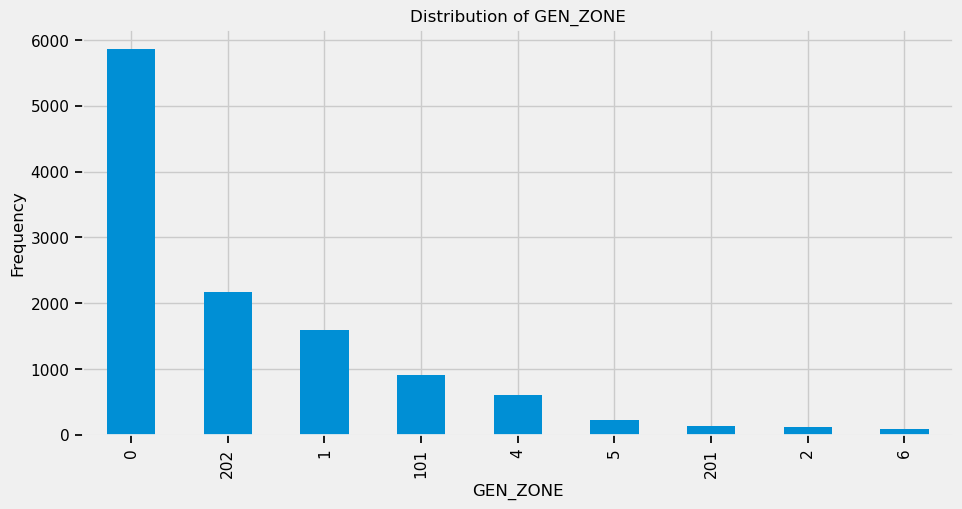

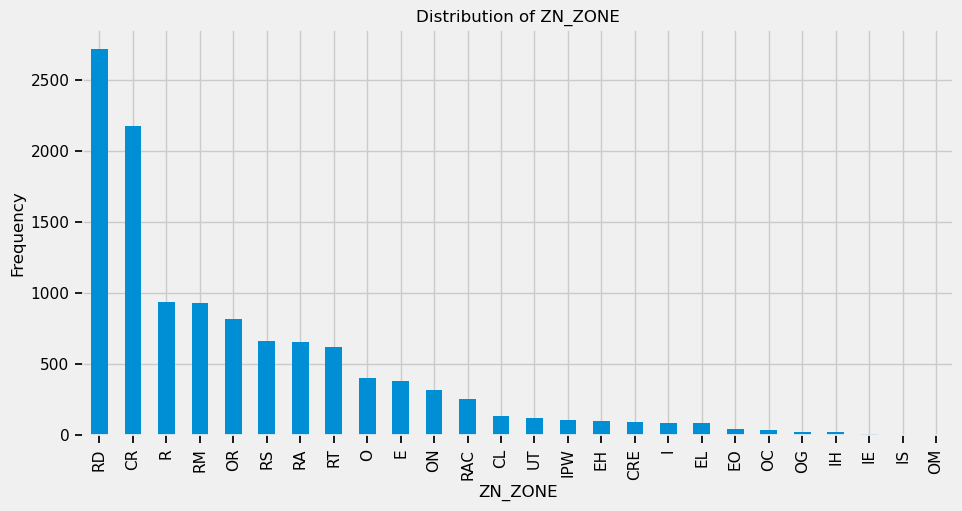

In [32]:
# Plot distribution of features 
columns_to_plot = ['GEN_ZONE', 'ZN_ZONE']

for column in columns_to_plot:
    plt.figure(figsize=(10, 5))
    zoning_data[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Observation for GEN_ZONE:

The trends observed in the distribution of zoning classifications in the City of Toronto are due to the city’s urban planning priorities, housing demand, and economic development strategies. Ontario’s Growth Plan for the Greater Golden Horseshoe mandates higher-density development and compact urban growth, shaping Toronto's zoning priorities. 
- Residential zones (0) are dominating because the city has prioritized housing to accommodate its rapidly growing population, bringing a high demand for housing.
- The high level of Commercial Residential zones (202) reflects Toronto’s push toward mixed-use neighborhoods to create vibrant, walkable communities. This also described why the commercial (201) zones are so low, since Toronto has increasingly focused on integrating commercial uses with residential.
- The high level of open space zones (1) is because Toronto emphasizes environmental conservation and recreation by preserving green spaces and parks.
- Utility and Transportation zones (2) are low because the specific infrastructure for transportation (rail yards, subway stations, highways) make up a small portion of the city's land, as they are not widespread compared to residential or mixed-use areas.
- Commercial Residential Employment zones (6) are extremely low because it is a relatively new zoning classification introduced to promote mixed-use developments with a focus on employment. Its low frequency reflects its gradual adoption, as older zoning classifications are still in effect in many parts of the city.

Observation for GEN_ZONE:

The trends observed in the distribution of zoning types (ZN_ZONE) in the City of Toronto reflect the city’s urban planning goals, historical land use, and development priorities. 

- Residential Detached (RD) zones are dominating because detached single-family homes have historically been the most common housing type in Toronto. These zones cater to families and make up the bulk of residential neighborhoods.
- There is a significant presence of Commercial Residential (CR) zones reflect Toronto’s push toward integrating residential and commercial uses, especially in downtown. Mixed-use zoning fosters walkable communities, reduces car usage, and aligns with sustainable urban growth principles.
- CRE, IS, OM and OG have low frequency because these zones represent either niche land uses (e.g., cemeteries, heritage properties) or newer categories like CRE (Commercial Residential Employment), which are gradually being applied as older zones are updated.

In [35]:
### would find outliers
### would find correlations
### references?

## Import City of Toronto Ward Shapefile

This dataset contains the City of Toronto ward boundaries in the WGS84 coordinate system. Wards are administrative divisions used for political, electoral, and governance purposes. This dataset contains spatial (geographic) and attribute information for each ward in the city.

In [46]:
import folium
# Load the shapefile
wards_data = gpd.read_file('WARD_WGS84.shp')

# Create a folium map
map_wards = folium.Map(location=[43.7, -79.4], zoom_start=11)  # Adjust to center on Toronto

# Add the ward shapefile to the map
folium.GeoJson(wards_data, 
               name="Wards"
              ).add_to(map_wards)

# Display the map
map_wards

In [48]:
# View geoDataFrame
wards_data.head()

,AREA_ID,AREA_TYPE,AREA_S_CD,AREA_L_CD,AREA_NAME,X,Y,LONGITUDE,LATITUDE,geometry
0,2551040,WD18,16,16,Don Valley East,318237.290,4844000.0,-79.33298,43.739716,"POLYGON ((-79.31335 43.71699, -79.3195 43.7156..."
1,2551044,WD18,03,03,Etobicoke-Lakeshore,303099.474,4831000.0,-79.52087,43.621646,"POLYGON ((-79.49777 43.65198, -79.49725 43.651..."
2,2551048,WD18,15,15,Don Valley West,314825.876,4843000.0,-79.37536,43.728396,"POLYGON ((-79.35232 43.71573, -79.35209 43.715..."
3,2551052,WD18,23,23,Scarborough North,324522.149,4852000.0,-79.25467,43.809672,"POLYGON ((-79.22591 43.8396, -79.22556 43.8394..."
4,2551056,WD18,11,11,University-Rosedale,313306.543,4837000.0,-79.39432,43.671139,"POLYGON ((-79.39004 43.6905, -79.39004 43.6905..."


## Data Analysis

In [51]:
wards_data.shape

(25, 10)

There is a row for every ward (25 wards). Let's see the columns.

In [54]:
# Check the columns in geoDataFrame
wards_data.columns

Index(['AREA_ID', 'AREA_TYPE', 'AREA_S_CD', 'AREA_L_CD', 'AREA_NAME', 'X', 'Y',
       'LONGITUDE', 'LATITUDE', 'geometry'],
      dtype='object')

The columns describe the following:
- 'AREA_ID': A unique identifier for each ward in the dataset.
- 'AREA_TYPE': Indicates the type of area (all is WD18 for wards in the 2018 model of Toronto).
- 'AREA_S_CD': A short code representing the ward, likely numeric.
- 'AREA_L_CD': A longer code that may provide additional context or differentiation for the ward.
- 'AREA_NAME': The official name of the ward.
- X,y : coordiantes in a projected coordinate system.
- Longitude, Latitude: Geographic lat and long of the ward's approximate center.
  
Let's explore the differences between 'AREA_S_CD' and 'AREA_L_CD'.

In [57]:
wards_data['AREA_S_CD'].unique()

array(['16', '03', '15', '23', '11', '10', '09', '05', '17', '08', '02',
       '01', '04', '12', '22', '21', '24', '25', '20', '19', '18', '06',
       '07', '14', '13'], dtype=object)

In [59]:
wards_data['AREA_L_CD'].unique()

array(['16', '03', '15', '23', '11', '10', '09', '05', '17', '08', '02',
       '01', '04', '12', '22', '21', '24', '25', '20', '19', '18', '06',
       '07', '14', '13'], dtype=object)

There are no differences between the two, therefore drop 'AREA_L_CD'. 

These other features will also be dropped:
- Drop 'AREA_ID' and let 'AREA_S_CD' act as the only identifier of the wards.
- Drop 'AREA_TYPE' as all wards are of type WD18, therefore, no new information or classification is provided. 

In [62]:
# Drop unnecessary columns 
wards_data = wards_data.drop(columns = ['AREA_ID', 'AREA_S_CD', 'AREA_TYPE'], errors='ignore')

# Check the columnsare dropped in geoDataFrame
wards_data.columns

Index(['AREA_L_CD', 'AREA_NAME', 'X', 'Y', 'LONGITUDE', 'LATITUDE',
       'geometry'],
      dtype='object')

In [64]:
# Check data types per column
print(wards_data.dtypes)

AREA_L_CD      object
AREA_NAME      object
X             float64
Y             float64
LONGITUDE     float64
LATITUDE      float64
geometry     geometry
dtype: object


Can see that the 'AREA_L_CD' and 'AREA_NAME' are object files, therefore there is no need to convert these into string files. 

## Data Cleaning

In [68]:
# Check for missing values
print(zoning_data.isnull().sum())
# Check for duplicates
zoning_data.duplicated().sum()

_id         0
GEN_ZONE    0
ZN_ZONE     0
geometry    0
dtype: int64


0

There are no missing values or duplicates. There are no outliers in this dataset because the non-identifying features (i.e., those not related to ward names or IDs) primarily represent geographic or shape-related data, such as coordinates and boundaries. These features describe the spatial characteristics of the wards and are not subject to variations that would typically be considered outliers.

## Combine the Files to One File

<Axes: >

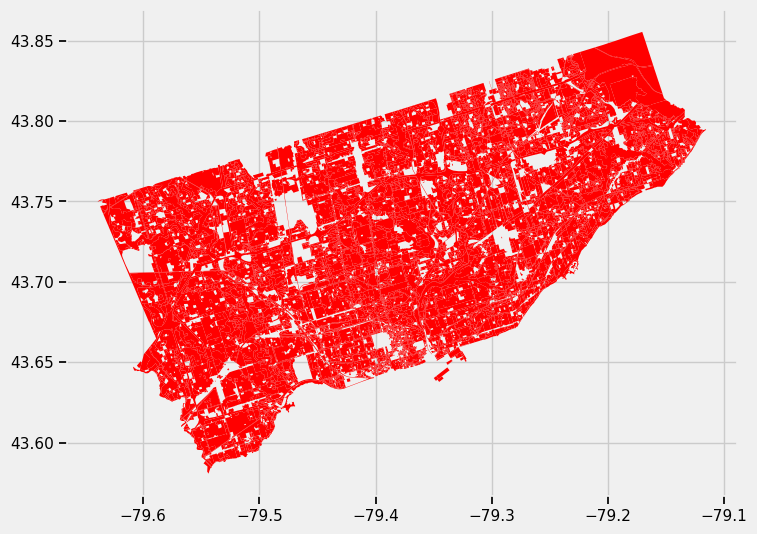

In [72]:
zoning_data['geometry'].plot(figsize=(12,6), color = 'red')

<Axes: >

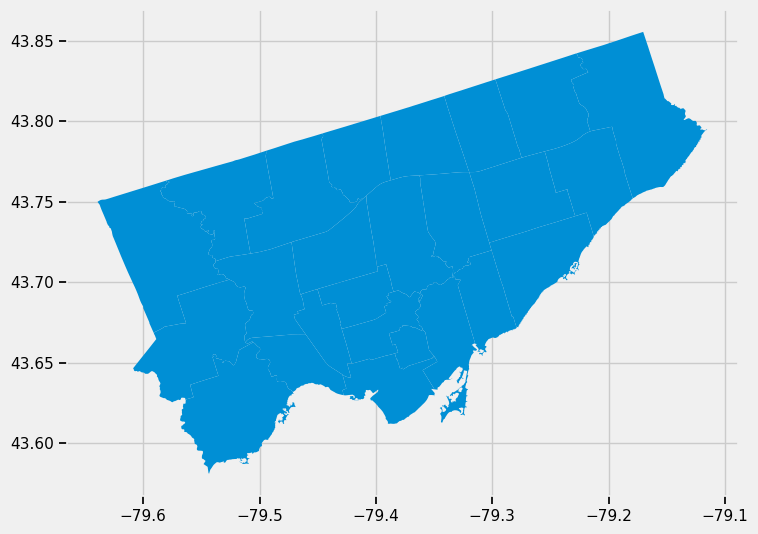

In [73]:
wards_data['geometry'].plot(figsize=(12,6))

In [74]:
zoning_gdf = zoning_data.to_crs(wards_data.crs)

In [96]:
zoning_gdf["geometry"] = zoning_gdf["geometry"].buffer(0)
wards_data["geometry"] = wards_data["geometry"].buffer(0)
# Explode multi-part geometries into individual parts
zoning_gdf = zoning_gdf.explode(index_parts=False)

In [97]:
zoning_gdf.head()

,_id,GEN_ZONE,ZN_ZONE,WARD_NAME,geometry
0,1,2,UT,Scarborough-Rouge Park,"POLYGON ((-79.2097 43.81729, -79.20976 43.8172..."
1,2,1,ON,York South-Weston,"POLYGON ((-79.50273 43.70976, -79.50275 43.709..."
2,3,0,RD,Scarborough North,"POLYGON ((-79.27433 43.80068, -79.27435 43.800..."
3,4,1,O,Etobicoke North,"POLYGON ((-79.5704 43.72175, -79.57046 43.7217..."
4,5,0,RD,Scarborough North,"POLYGON ((-79.26202 43.81195, -79.26198 43.811..."


In [100]:
wards_data.head()

,AREA_L_CD,AREA_NAME,X,Y,LONGITUDE,LATITUDE,geometry
0,16,Don Valley East,318237.290,4844000.0,-79.33298,43.739716,"POLYGON ((-79.31335 43.71699, -79.3195 43.7156..."
1,03,Etobicoke-Lakeshore,303099.474,4831000.0,-79.52087,43.621646,"POLYGON ((-79.49777 43.65198, -79.49725 43.651..."
2,15,Don Valley West,314825.876,4843000.0,-79.37536,43.728396,"POLYGON ((-79.35232 43.71573, -79.35209 43.715..."
3,23,Scarborough North,324522.149,4852000.0,-79.25467,43.809672,"POLYGON ((-79.22591 43.8396, -79.22556 43.8394..."
4,11,University-Rosedale,313306.543,4837000.0,-79.39432,43.671139,"POLYGON ((-79.39004 43.6905, -79.39004 43.6905..."


In [114]:
# Add a new column to the zoning data with the corresponding ward number (AREA_L_CD)
def ward_number(geometry, wards):
    # Find the ward that contains or intersects the zoning geometry
    match = wards[wards.intersects(geometry)]
    return match.iloc[0]["AREA_L_CD"] if not match.empty else None

# Apply the function to each row in the zoning data
zoning_gdf["WARD_NUMBER"] = zoning_gdf.apply(lambda row: ward_number(row.geometry, wards_data), axis=1)

# Preview the result
zoning_gdf.head()

,_id,GEN_ZONE,ZN_ZONE,WARD_NAME,geometry,WARD_NUMBER
0,1,2,UT,Scarborough-Rouge Park,"POLYGON ((-79.2097 43.81729, -79.20976 43.8172...",25
1,2,1,ON,York South-Weston,"POLYGON ((-79.50273 43.70976, -79.50275 43.709...",05
2,3,0,RD,Scarborough North,"POLYGON ((-79.27433 43.80068, -79.27435 43.800...",23
3,4,1,O,Etobicoke North,"POLYGON ((-79.5704 43.72175, -79.57046 43.7217...",01
4,5,0,RD,Scarborough North,"POLYGON ((-79.26202 43.81195, -79.26198 43.811...",23


In [116]:
zoning_gdf.isnull().sum()

_id            0
GEN_ZONE       0
ZN_ZONE        0
WARD_NAME      0
geometry       0
WARD_NUMBER    0
dtype: int64